<a href="https://colab.research.google.com/github/yuione51/sample/blob/main/learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np

# 가상 데이터셋 생성
np.random.seed(42)
num_records = 1000

# 회원 ID와 날짜 생성
members = np.random.randint(1000, 2000, num_records)
dates = pd.date_range(start='2022-01-01', periods=num_records // 24, freq='D').tolist() * 24

# 학습 상태 및 오류 코드 생성
status = np.random.choice(['진행 중', '완료', '중단', '미시작'], num_records)
error_codes = np.random.choice(['상태 불일치', '진행 중단', '기록 누락', np.nan], num_records, p=[0.3, 0.2, 0.2, 0.3])
fix_status = np.random.choice(['수정됨', '미수정'], num_records)

# 데이터 프레임 생성
data = pd.DataFrame({
    '회원 ID': members,
    '날짜': pd.date_range(start='2022-01-01', periods=num_records, freq='H'),
    '학습 상태': status,
    '오류 코드': error_codes,
    '수정 여부': fix_status
})

# 오류 데이터 샘플링
data_with_errors = data[data['오류 코드'].notna()]

# 오류 빈도를 다양하게 하기 위해 일부 오류 제거
data_with_errors = data_with_errors.sample(frac=0.8, random_state=42)

# 데이터 저장
file_path = 'adjusted_sample_learning_status_dataset.csv'
data_with_errors.to_csv(file_path, index=False)

In [13]:
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('adjusted_sample_learning_status_dataset.csv')

# 날짜 형식 변환
data['날짜'] = pd.to_datetime(data['날짜'])


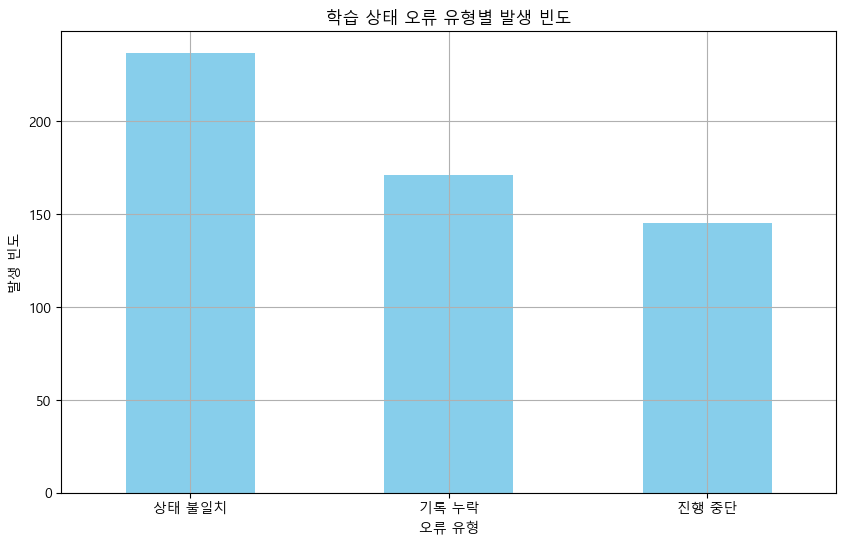

In [16]:
# 오류 유형별 발생 빈도 계산
error_type_counts = data['오류 코드'].value_counts()

# 시각화: 학습 상태 오류 유형별 발생 빈도
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
error_type_counts.plot(kind='bar', color='skyblue')
plt.title('학습 상태 오류 유형별 발생 빈도')
plt.xlabel('오류 유형')
plt.ylabel('발생 빈도')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

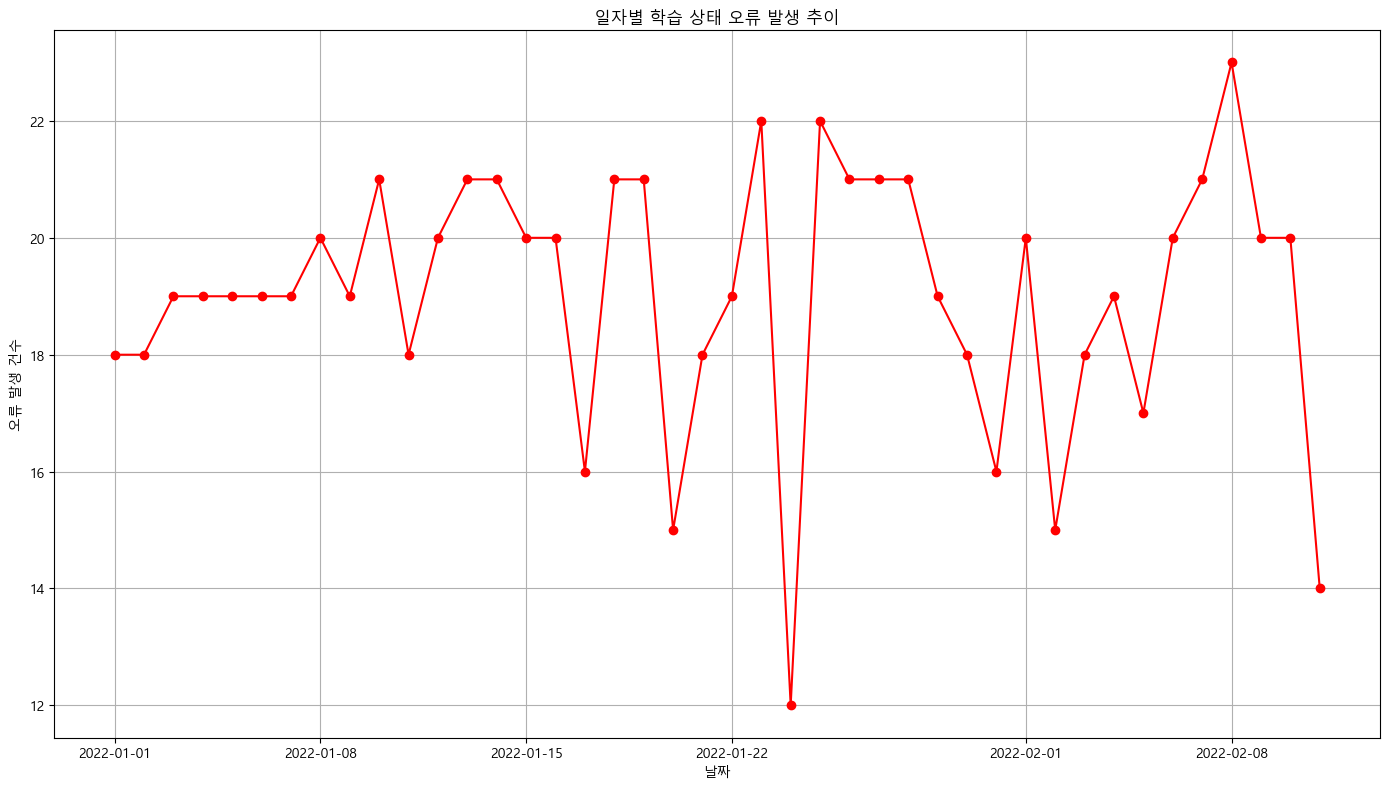

In [17]:
# 일자별 오류 발생 건수 계산
daily_errors = data.groupby(data['날짜'].dt.date).size()

# 시각화: 일자별 학습 상태 오류 발생 추이
plt.figure(figsize=(14, 8))
plt.plot(daily_errors.index, daily_errors.values, marker='o', linestyle='-', color='red')
plt.title('일자별 학습 상태 오류 발생 추이')
plt.xlabel('날짜')
plt.ylabel('오류 발생 건수')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [18]:
# 오류 수정 - 학습 상태 불일치 오류 수정 (가정: 상태 불일치를 '진행 중'으로 수정)
data.loc[data['오류 코드'] == '상태 불일치', '학습 상태'] = '진행 중'

# 오류 수정 - 학습 진행 중단 오류 수정 (가정: 진행 중단을 '진행 중'으로 수정)
data.loc[data['오류 코드'] == '진행 중단', '학습 상태'] = '진행 중'

# 오류 수정 - 학습 기록 누락 오류 수정 (가정: 기록 누락을 '완료'로 수정)
data.loc[data['오류 코드'] == '기록 누락', '학습 상태'] = '완료'

# 수정 여부 업데이트
data['수정 여부'] = '수정됨'

In [19]:
# 오류 수정 전후 비교를 위한 데이터 분할
original_data = pd.read_csv('adjusted_sample_learning_status_dataset.csv')
original_data['날짜'] = pd.to_datetime(original_data['날짜'])

# 오류 유형별 발생 빈도 (수정 전)
error_counts_before = original_data['오류 코드'].value_counts()

# 오류 유형별 발생 빈도 (수정 후)
error_counts_after = data['오류 코드'].value_counts()

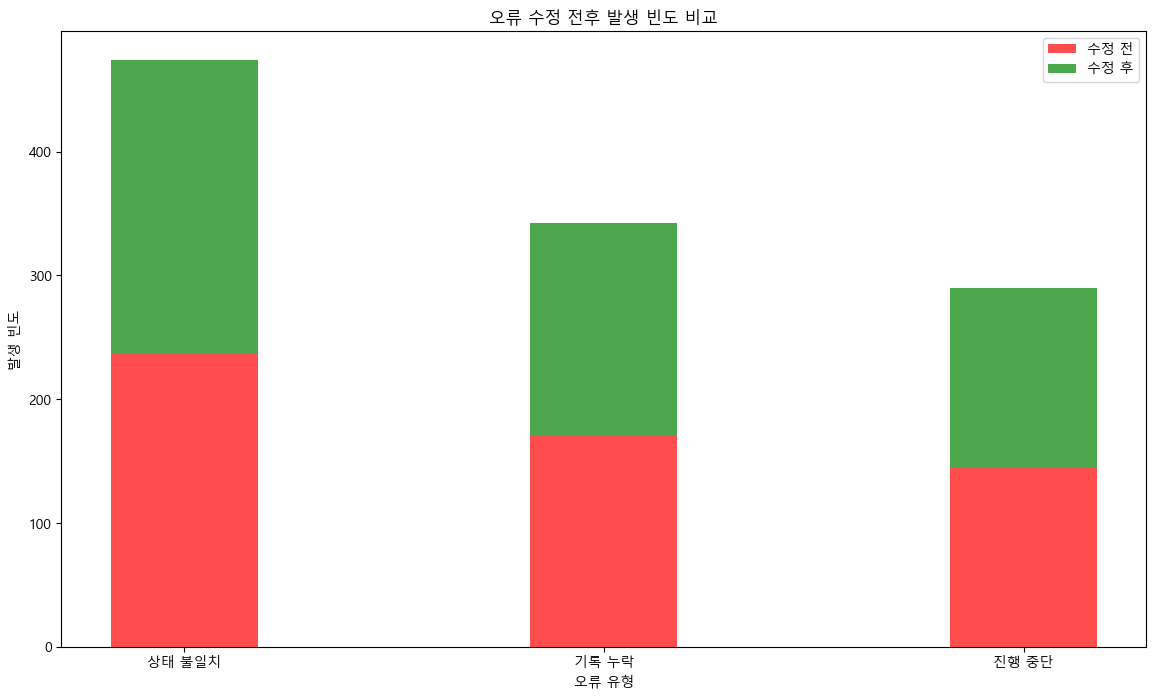

In [20]:
# 시각화: 오류 수정 전후 발생 빈도 비교
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.35
ax.bar(error_counts_before.index, error_counts_before.values, width, label='수정 전', color='red', alpha=0.7)
ax.bar(error_counts_after.index, error_counts_after.values, width, label='수정 후', color='green', alpha=0.7, bottom=error_counts_before.values)

ax.set_title('오류 수정 전후 발생 빈도 비교')
ax.set_xlabel('오류 유형')
ax.set_ylabel('발생 빈도')
ax.legend()

plt.show()

In [21]:
# 가상 처리 시간을 생성하여 후속 처리 절차 최적화 시각화

# 단계별 처리 시간 (단위: 시간)
stages = ['오류 식별', '오류 원인 분석', '오류 수정', '데이터 검증', '고객 통보']
time_before = [2, 2, 3, 5, 4]  # 오류 수정 전 시간
time_after = [1, 1, 2, 2, 2]  # 오류 수정 후 시간

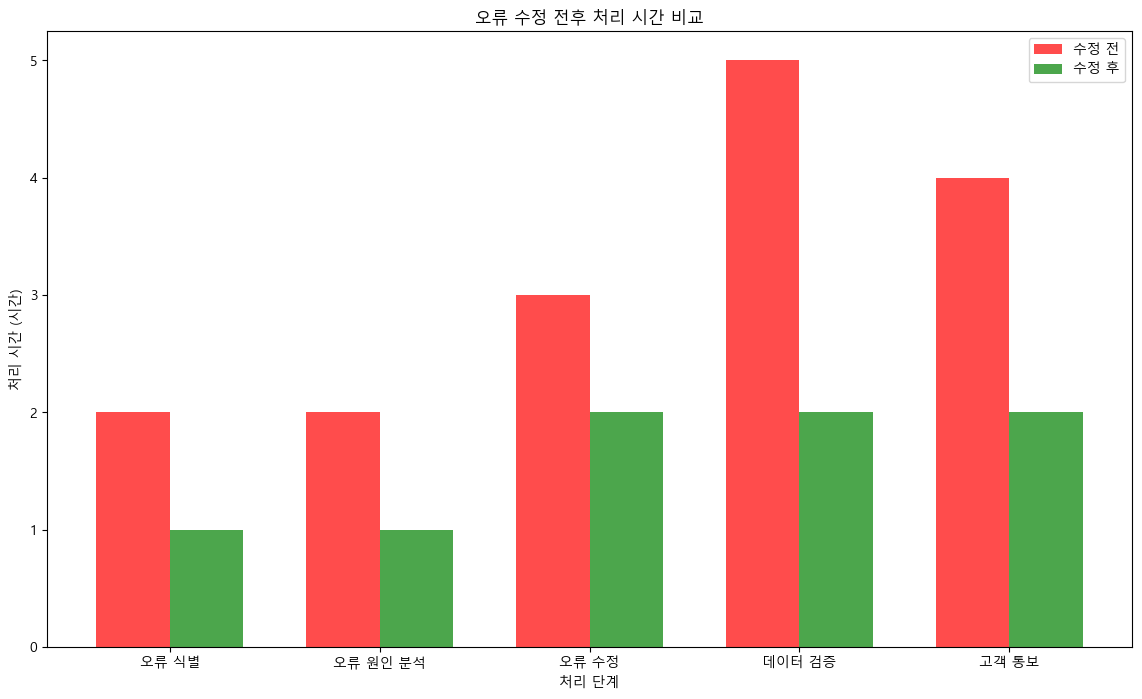

In [22]:
# 시각화
fig, ax = plt.subplots(figsize=(14, 8))
width = 0.35
ind = np.arange(len(stages))

p1 = ax.bar(ind - width/2, time_before, width, label='수정 전', color='red', alpha=0.7)
p2 = ax.bar(ind + width/2, time_after, width, label='수정 후', color='green', alpha=0.7)

ax.set_title('오류 수정 전후 처리 시간 비교')
ax.set_xlabel('처리 단계')
ax.set_ylabel('처리 시간 (시간)')
ax.set_xticks(ind)
ax.set_xticklabels(stages)
ax.legend()

plt.show()